# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))


There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

(250, 250, 3) (395, 400, 3)
Number of faces detected: 1


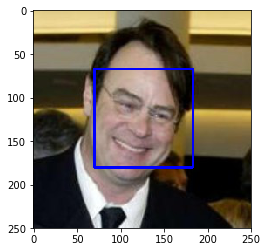

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
img_dog = cv2.imread(dog_files[4])
print(img.shape,img_dog.shape)
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
98% for human_files that detect human faces
17% for dog_files that detect human faces

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

import numpy as np

label_humans = np.zeros(100)
for i in range(100):
    label_humans[i] = face_detector(human_files_short[i])
print("human percentage:",sum(label_humans)/100)

label_dogs = np.zeros(100)
for i in range(100):
    label_dogs[i] = face_detector(dog_files_short[i])
print("dog percentage:",sum(label_dogs)/100)



human percentage: 0.98
dog percentage: 0.17


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [25]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [5]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:25<00:00, 21536059.26it/s]


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

In [27]:
VGG16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [6]:
from PIL import Image
import torchvision.transforms as transforms


def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    img = Image.open(img_path).convert('RGB')
    loader = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop([224,224]),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])
    image_processed = loader(img)[:3,:,:].unsqueeze(0)

    outputs = VGG16(image_processed.to('cuda'))
    _, preds = torch.max(outputs, 1)
    predicted_labels = np.squeeze(preds.cpu().numpy()) 
    
    
    return int(predicted_labels)# predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [7]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    label = VGG16_predict(img_path)
    if label >=151 and label <=268:
        out = True
    else: 
        out = False
    return out # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 
For human, it's 1%; For dog, it's 100%.

In [8]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

import numpy as np

label_humans_dog = np.zeros(100)
for i in range(100):
    label_humans_dog[i] = dog_detector(human_files_short[i])
print("human percentage:",sum(label_humans_dog)/100)

label_dogs_dog = np.zeros(100)
for i in range(100):
    label_dogs_dog[i] = dog_detector(dog_files_short[i])
print("dog percentage:",sum(label_dogs_dog)/100)

human percentage: 0.0
dog percentage: 1.0


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [31]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [58]:
import os
import torch
from torchvision import datasets
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes


# number of samples per batch to load
batch_size = 16

# number of subprocesses to use for data loading
num_workers = 2

# convert data to a normalized torch.FloatTensor
transform = transforms.Compose([transforms.Resize(224),
                                transforms.CenterCrop((224,224)),
                                transforms.RandomHorizontalFlip(), # randomly flip and rotate
                                transforms.RandomRotation(10),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

# define training, test and validation data directories
data_dir = '/data/dog_images/'

image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), transform)
                  for x in ['train', 'valid', 'test']}
loaders_scratch = {
    x: torch.utils.data.DataLoader(image_datasets[x], 
                                   shuffle=True, 
                                   batch_size=batch_size, 
                                   num_workers=num_workers)
    for x in ['train', 'valid', 'test']}


dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid', 'test']}
class_names = image_datasets['train'].classes
n_classes = len(class_names)
  

# print statistics about the dataset
print(f"No. of Training Records: {dataset_sizes['train']}")
print(f"No. of Validation Records: {dataset_sizes['valid']}")
print(f"No. of Testing Records: {dataset_sizes['test']}")      
print(f"No. of Classes: {n_classes}")
      
#Check if gpu support is available
use_cuda = torch.cuda.is_available()
      

No. of Training Records: 6680
No. of Validation Records: 835
No. of Testing Records: 836
No. of Classes: 133


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**: Cropping is used to resize the image. I chose the size 256 because it is commonly used in image uint8 format and is good to start with. I decided to augment the dataset by flipping and rotations.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [21]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        # convolutional layer (sees 224x224x3 image tensor)
        self.conv1 = nn.Conv2d(3, 16, 3, padding = 1 )        
        # convolutional layer (sees 112x112x16 image tensor)
        self.conv2 = nn.Conv2d(16, 32, 3, padding = 1)
        # convolutional layer (sees 56x56x32 image tensor)
        self.conv3 = nn.Conv2d(32, 64, 3, padding = 1)
        # convolutional layer (sees 28x28x64 image tensor)
        self.conv4 = nn.Conv2d(64, 128, 3, padding = 1)        
        # convolutional layer (sees 14x14x128 image tensor)
        self.conv5 = nn.Conv2d(128, 256, 3, padding = 1 )
        
        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        # dropout layer (p=0.2)
        self.dropout = nn.Dropout(0.2)
        
        self.conv_bn1 = nn.BatchNorm2d(224,3)
        self.conv_bn2 = nn.BatchNorm2d(16)
        self.conv_bn3 = nn.BatchNorm2d(32)
        self.conv_bn4 = nn.BatchNorm2d(64)
        self.conv_bn5 = nn.BatchNorm2d(128)
        self.conv_bn6 = nn.BatchNorm2d(256)
        
        # linear layer (256 * 7 * 7 -> 512)
        self.fc1 = nn.Linear(256 * 7 * 7, 512)
        # linear layer (256 * 7 * 7 -> n_classes (133))
        self.fc2 = nn.Linear(512, 133)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.conv_bn2(x)
        x = self.pool(F.relu(self.conv2(x)))
        x = self.conv_bn3(x)
        x = self.pool(F.relu(self.conv3(x)))
        x = self.conv_bn4(x)
        x = self.pool(F.relu(self.conv4(x)))
        x = self.conv_bn5(x)
        x = self.pool(F.relu(self.conv5(x)))
        x = self.conv_bn6(x)
        
        # flatten image input
        x = x.view(-1, 256 * 7 * 7)        
        # add dropout layer
        x = self.dropout(x)
        # add second hidden layer
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

In [14]:
Net()

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.2)
  (conv_bn1): BatchNorm2d(224, eps=3, momentum=0.1, affine=True, track_running_stats=True)
  (conv_bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_bn3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_bn4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_bn5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_bn6): BatchNorm2d(2

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__  
The structure is listed above.
I used three CNN layers to generalize the images and extract the feature. Then I used linear classifier to convert the abstract features to the classified type and the dropout layer to overcome overfitting.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [22]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.001, momentum = 0.9)

In [23]:
import matplotlib.pyplot as plt
import numpy as np


def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf

    epoch_training_loss = np.arange(n_epochs)
    epoch_valid_loss = np.arange(n_epochs)
    if os.path.exists(save_path):
        model.load_state_dict(torch.load(save_path))
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
       
        # train the model       
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update training loss
            train_loss = train_loss + ((1/(batch_idx+1))*(loss.data -train_loss))
            
          
        # validate the model         
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update average validation loss 
            valid_loss = valid_loss + ((1/(batch_idx+1))*(loss.data -valid_loss))
  
            
        # calculate average losses
        #train_loss = train_loss/len(loaders['train'].dataset)
        #valid_loss = valid_loss/len(loaders['valid'].dataset)
        epoch_training_loss[epoch-1] = train_loss    
        epoch_valid_loss[epoch-1] = valid_loss   
        
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss has decreased ({:.6f} --> {:.6f}).  Saving model now ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss            
    # return trained model
    return model, epoch_training_loss, epoch_valid_loss

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [19]:
# train the model
n_epochs = 30
model_scratch1, epoch_training_loss1, epoch_valid_loss1 = train(n_epochs, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratchnn2.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratchnn2.pt'))


Epoch: 1 	Training Loss: 4.627890 	Validation Loss: 4.323923
Validation loss has decreased (inf --> 4.323923).  Saving model now ...
Epoch: 2 	Training Loss: 4.092248 	Validation Loss: 4.007272
Validation loss has decreased (4.323923 --> 4.007272).  Saving model now ...
Epoch: 3 	Training Loss: 3.726243 	Validation Loss: 3.850281
Validation loss has decreased (4.007272 --> 3.850281).  Saving model now ...
Epoch: 4 	Training Loss: 3.442864 	Validation Loss: 3.723124
Validation loss has decreased (3.850281 --> 3.723124).  Saving model now ...
Epoch: 5 	Training Loss: 3.211971 	Validation Loss: 3.621762
Validation loss has decreased (3.723124 --> 3.621762).  Saving model now ...
Epoch: 6 	Training Loss: 2.976221 	Validation Loss: 3.644069
Epoch: 7 	Training Loss: 2.771861 	Validation Loss: 3.549562
Validation loss has decreased (3.621762 --> 3.549562).  Saving model now ...
Epoch: 8 	Training Loss: 2.564226 	Validation Loss: 3.431377
Validation loss has decreased (3.549562 --> 3.431377). 

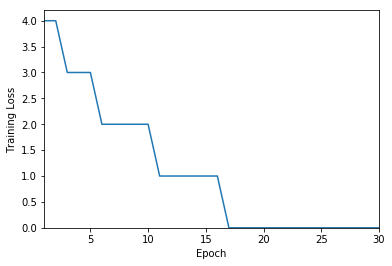

In [27]:
#plot
import numpy as np
import matplotlib.pyplot as plt
epoch_x = np.arange(n_epochs)
plt.figure(1)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.plot(epoch_x+1, epoch_training_loss1, label='Training loss')
#plt.plot(epoch_x+1, epoch_validation_loss1, label='Validation loss')
plt.ylim(0,4.2)
plt.xlim(1,30)
plt.show()


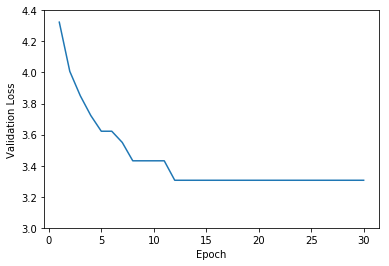

In [22]:
#plot
import numpy as np
import matplotlib.pyplot as plt
epoch_x = np.arange(30)
plt.figure(2)
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
epoch_valid_loss1 = [4.323923,4.007272,3.850281,3.723124,3.621762,3.621762,3.549562,3.431377,3.431377,3.431377,3.431377,3.306066,3.306066,3.306066,3.306066,3.306066,3.306066,3.306066,3.306066,3.306066,3.306066,3.306066,3.306066,3.306066,3.306066,3.306066,3.306066,3.306066,3.306066,3.306066]
#plt.plot(epoch_x+1, epoch_training_loss1, label='Training loss')
plt.plot(epoch_x+1, epoch_valid_loss1, label='Validation loss')
plt.ylim(3,4.4)
plt.show()


In [31]:
###### class_names = [item[4:].replace("_", " ") for item in image_datasets['train'].classes]
print(class_names)

['Affenpinscher', 'Afghan hound', 'Airedale terrier', 'Akita', 'Alaskan malamute', 'American eskimo dog', 'American foxhound', 'American staffordshire terrier', 'American water spaniel', 'Anatolian shepherd dog', 'Australian cattle dog', 'Australian shepherd', 'Australian terrier', 'Basenji', 'Basset hound', 'Beagle', 'Bearded collie', 'Beauceron', 'Bedlington terrier', 'Belgian malinois', 'Belgian sheepdog', 'Belgian tervuren', 'Bernese mountain dog', 'Bichon frise', 'Black and tan coonhound', 'Black russian terrier', 'Bloodhound', 'Bluetick coonhound', 'Border collie', 'Border terrier', 'Borzoi', 'Boston terrier', 'Bouvier des flandres', 'Boxer', 'Boykin spaniel', 'Briard', 'Brittany', 'Brussels griffon', 'Bull terrier', 'Bulldog', 'Bullmastiff', 'Cairn terrier', 'Canaan dog', 'Cane corso', 'Cardigan welsh corgi', 'Cavalier king charles spaniel', 'Chesapeake bay retriever', 'Chihuahua', 'Chinese crested', 'Chinese shar-pei', 'Chow chow', 'Clumber spaniel', 'Cocker spaniel', 'Collie',

In [43]:
def train_accuracy(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    train_loss = 0.
    correct = 0.
    total = 0.
    y_pred = []
    y_true = []
    
    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['train']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        y_true.append(target)
        
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        train_loss = train_loss + ((1/(batch_idx+1))*(loss.data -train_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        y_pred.append(pred)
        
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Train Loss: {:.6f}\n'.format(train_loss))

    print('\nTrain Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))
    return y_true,y_pred

# call test function    


In [44]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.
    
    
    
    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1/(batch_idx+1))*(loss.data-test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))
    
    return 

# call test function    


In [45]:
def validation_accuracy(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    validation_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['valid']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()

        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss ()
        validation_loss = validation_loss + ((1/(batch_idx+1))*(loss.data-validation_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Validation Loss: {:.6f}\n'.format(validation_loss))

    print('\nValidation Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))
    

# call test function    


In [46]:
train_accuracy(loaders_scratch, model_scratch, criterion_scratch, use_cuda)
validation_accuracy(loaders_scratch, model_scratch, criterion_scratch, use_cuda)
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Train Loss: 1.207671


Train Accuracy: 72% (4816/6680)
Validation Loss: 3.324067


Validation Accuracy: 23% (196/835)
Test Loss: 3.229028


Test Accuracy: 22% (184/836)


In [47]:
train_accuracy(loaders_scratch, model_scratch1, criterion_scratch, use_cuda)
validation_accuracy(loaders_scratch, model_scratch1, criterion_scratch, use_cuda)
test(loaders_scratch, model_scratch1, criterion_scratch, use_cuda)

Train Loss: 1.204011


Train Accuracy: 71% (4804/6680)
Validation Loss: 3.308513


Validation Accuracy: 23% (198/835)
Test Loss: 3.220325


Test Accuracy: 23% (195/836)


In [ ]:
from sklearn.metrics import f1_score
print(y_)
f1_score(y_true, y_pred, average=None)

#plot confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score 
y_pred = np.argmax(y_pred, axis=1).astype(int)
cm = confusion_matrix(y_true, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(30, 26))
plt.title('Confusion Matrix on Test Images')
_ = sns.heatmap(cm, ax=ax, yticklabels=class_names, xticklabels=class_names, robust=True)

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [48]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.
    
    
    
    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))
    
    return 

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)


Test Loss: 3.209510


Test Accuracy: 23% (197/836)


In [128]:

def test_analysis(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.
    
    classnum = 133
    target_num = torch.zeros((1,classnum))
    predict_num = torch.zeros((1,classnum))
    acc_num = torch.zeros((1,classnum))
   
    y_true = []
    y_pred = []
    
    model.eval()
    for batch_idx, (inputs, targets) in enumerate(loaders['test']):
        if use_cuda:
            inputs, targets = inputs.cuda(), targets.cuda()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        # loss is variable , if add it(+=loss) directly, there will be a bigger ang bigger graph.
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        predicted = outputs.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(predicted.eq(targets.data.view_as(predicted))).cpu().numpy())
        total += inputs.size(0)

        pre_mask = torch.zeros(outputs.size()).scatter_(1, predicted.cpu().view(-1, 1), 1.)
        predict_num += pre_mask.sum(0)
        tar_mask = torch.zeros(outputs.size()).scatter_(1, targets.data.cpu().view(-1, 1), 1.)
        target_num += tar_mask.sum(0)
        acc_mask = pre_mask*tar_mask
        acc_num += acc_mask.sum(0)
        
      
        y_pred.append(predicted.data.cpu().numpy())
        y_true.append(targets.data.cpu().numpy())
        
    recall = acc_num/target_num
    precision = acc_num/predict_num
    F1 = 2*recall*precision/(recall+precision)
    
    accuracy = acc_num.sum(1)/target_num.sum(1)

    
    recall = (recall.numpy()[0]*100).round(3)
    precision = (precision.numpy()[0]*100).round(3)
    F1 = (F1.numpy()[0]*100).round(3)
    accuracy = (accuracy.numpy()[0]*100).round(3)


    print('recall\n'," ".join('%s' % id for id in recall))
    print('precision\n'," ".join('%s' % id for id in precision))
    print('F1\n'," ".join('%s' % id for id in F1))
    print('accuracy\n',accuracy)
    print('Test Loss: {:.6f}\n'.format(test_loss))

    return recall,precision,F1,y_pred,y_true



In [92]:
# call test function    
model_scratch.load_state_dict(torch.load('model_scratchnn2.pt'))


In [129]:
recall,precision,F1,y_pred,y_true=test_analysis(loaders_scratch, model_scratch, criterion_scratch, use_cuda)


recall
 62.5 0.0 0.0 25.0 30.0 37.5 0.0 12.5 25.0 16.667 22.222 11.111 0.0 11.111 30.0 50.0 25.0 28.571 16.667 25.0 37.5 0.0 50.0 25.0 25.0 0.0 50.0 0.0 70.0 57.143 14.286 62.5 20.0 50.0 0.0 12.5 50.0 28.571 0.0 42.857 22.222 37.5 0.0 0.0 14.286 22.222 42.857 14.286 16.667 0.0 25.0 0.0 0.0 14.286 14.286 33.333 77.778 57.143 16.667 37.5 0.0 16.667 0.0 0.0 20.0 0.0 0.0 0.0 14.286 33.333 37.5 16.667 40.0 0.0 0.0 0.0 40.0 0.0 37.5 0.0 0.0 37.5 33.333 0.0 75.0 28.571 25.0 66.667 0.0 12.5 42.857 20.0 0.0 60.0 50.0 0.0 0.0 20.0 20.0 0.0 66.667 0.0 14.286 0.0 0.0 0.0 16.667 33.333 20.0 0.0 20.0 14.286 0.0 0.0 25.0 0.0 16.667 28.571 50.0 80.0 33.333 25.0 20.0 0.0 0.0 33.333 0.0 0.0 16.667 20.0 33.333 0.0 0.0
precision
 17.857 0.0 0.0 13.333 27.273 50.0 0.0 11.111 100.0 7.143 33.333 25.0 nan 11.111 50.0 26.667 11.765 100.0 50.0 100.0 25.0 0.0 57.143 40.0 50.0 0.0 36.364 0.0 63.636 28.571 14.286 50.0 12.5 33.333 0.0 7.143 21.429 22.222 0.0 37.5 13.333 23.077 0.0 0.0 7.143 40.0 75.0 16.667 25.0 0.

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/ranking.py:571: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


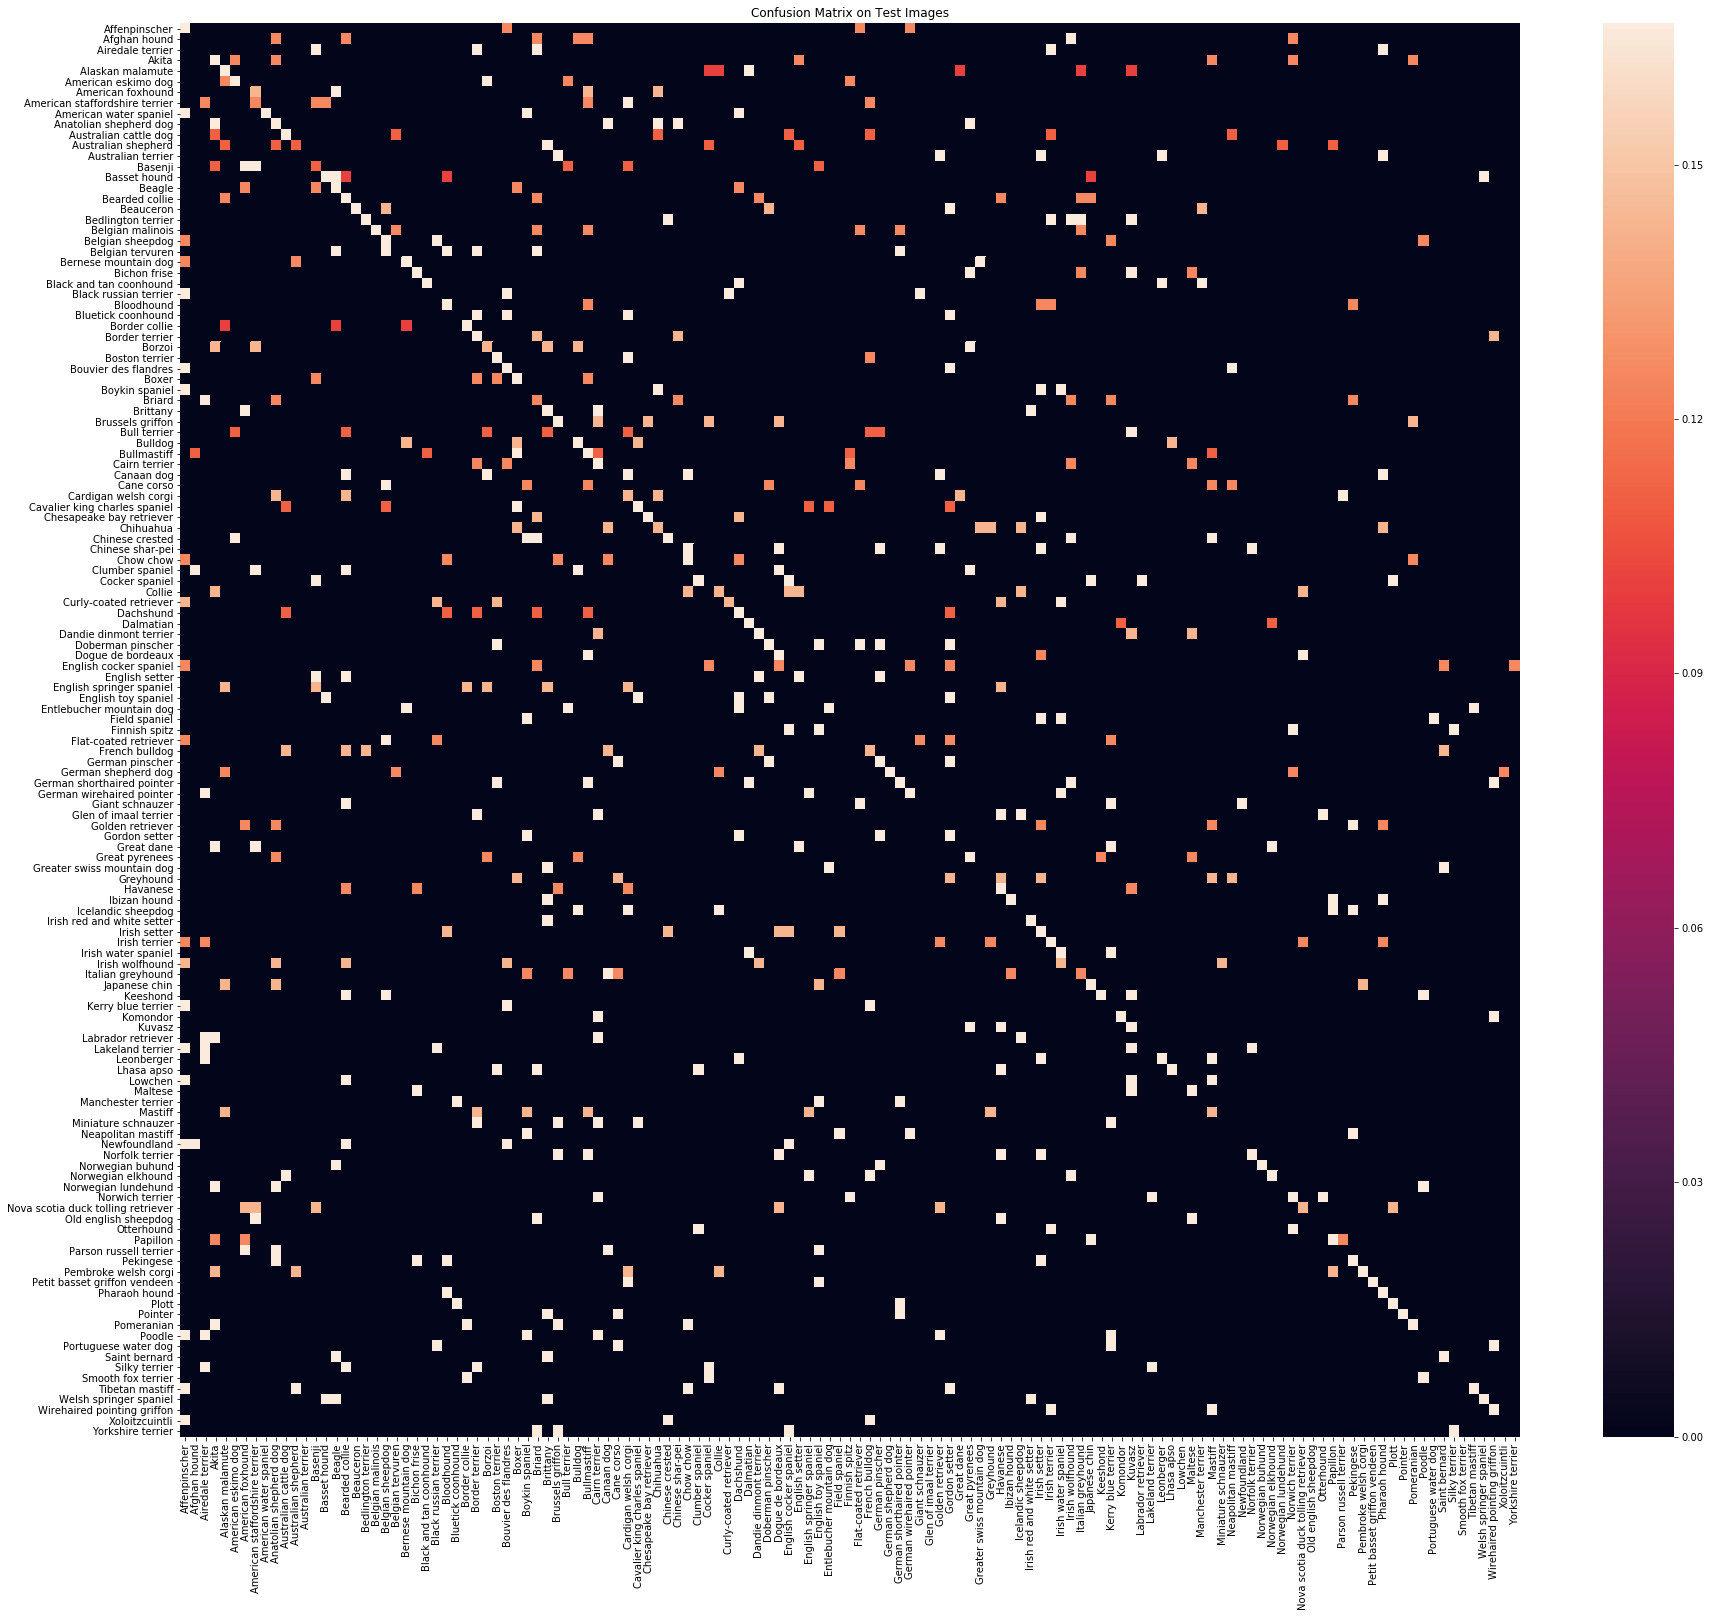

In [147]:
class_test_names = [item[4:].replace("_", " ") for item in image_transfer_datasets['test'].classes]
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score 
import seaborn as sns

y_true_array = np.concatenate([np.array(i) for i in y_true])
y_pred_a = np.concatenate([np.array(i) for i in y_pred])
y_pred_array = np.concatenate([np.array(i) for i in y_pred_a])   

fpr, tpr, thresholds = roc_curve(y_true_array,y_pred_array, pos_label=int)
cm = confusion_matrix(y_true_array, y_pred_array)
#normalize the confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(30, 26))
plt.title('Confusion Matrix on Test Images')
_ = sns.heatmap(cm, ax=ax, yticklabels=class_test_names, xticklabels=class_test_names, robust=True)


In [158]:
print(classification_report(y_true=y_true_array, y_pred=y_pred_array, target_names=list(class_test_names)))


                                    precision    recall  f1-score   support

                     Affenpinscher       0.18      0.62      0.28         8
                      Afghan hound       0.00      0.00      0.00         8
                  Airedale terrier       0.00      0.00      0.00         6
                             Akita       0.13      0.25      0.17         8
                  Alaskan malamute       0.27      0.30      0.29        10
               American eskimo dog       0.50      0.38      0.43         8
                 American foxhound       0.00      0.00      0.00         7
    American staffordshire terrier       0.11      0.12      0.12         8
            American water spaniel       1.00      0.25      0.40         4
            Anatolian shepherd dog       0.07      0.17      0.10         6
             Australian cattle dog       0.33      0.22      0.27         9
               Australian shepherd       0.25      0.11      0.15         9
           

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


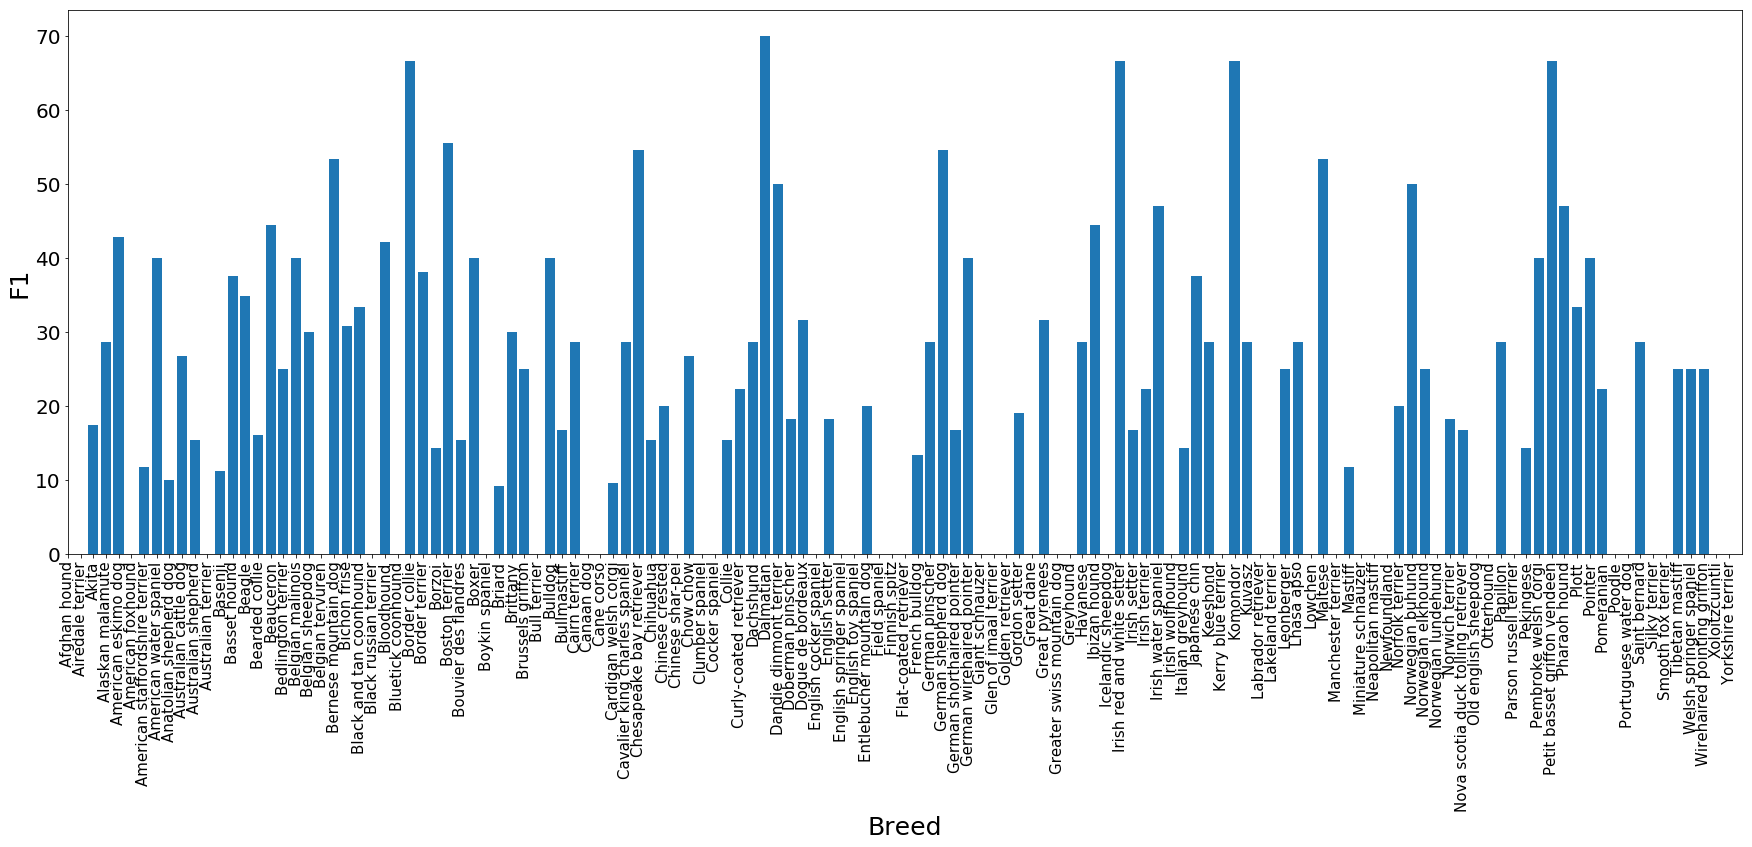

In [171]:
#plot
import numpy as np
import matplotlib.pyplot as plt

plt.figure(3)
fig, ax = plt.subplots(figsize=(30, 10))
plt.xlabel('Breed')
plt.ylabel('F1')
plt.bar(class_test_names,F1)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=20) 
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('axes', titlesize=23)     # fontsize of the axes title
plt.xlim(1,133)
plt.xticks(rotation=90)


plt.show()



---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [29]:
## TODO: Specify data loaders
import os
from torchvision import datasets
import torchvision.transforms as transforms
import torch.utils.data
data_transfer_dir = '/data/dog_images/'
# number of samples per batch to load
batch_size = 16

# number of subprocesses to use for data loading
num_workers = 2
# convert data to a normalized torch.FloatTensor
transform_transfer = transforms.Compose([transforms.Resize(224),
                                transforms.CenterCrop((224,224)),
                                transforms.RandomHorizontalFlip(), # randomly flip and rotate
                                transforms.RandomRotation(10),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

image_transfer_datasets = {x: datasets.ImageFolder(os.path.join(data_transfer_dir, x), transform_transfer)
                  for x in ['train', 'valid', 'test']}
loaders_transfer = {
    x: torch.utils.data.DataLoader(image_transfer_datasets[x], 
                                   shuffle=True, 
                                   batch_size=batch_size, 
                                   num_workers=num_workers)
    for x in ['train', 'valid', 'test']}

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [26]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.resnet50(pretrained=True)


if use_cuda:
    model_transfer = model_transfer.cuda()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 80819459.39it/s]


__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__  Resnet50 is a CNN classsfier similar to the VGG16. I did some internet searches and found it worked fine.


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [27]:
import torch.optim as optim
import torch.nn as nn
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.fc.parameters(), lr=0.001, momentum = 0.9)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [30]:
# train the model
n_epochs = 12
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer3.pt')

# load the model that got the best validation accuracy (uncomment the line below)
#model_transfer.load_state_dict(torch.load('model_transfer3.pt'))

Epoch: 1 	Training Loss: 5.792991 	Validation Loss: 3.489913
Validation loss has decreased (inf --> 3.489913).  Saving model now ...
Epoch: 2 	Training Loss: 2.808695 	Validation Loss: 1.955199
Validation loss has decreased (3.489913 --> 1.955199).  Saving model now ...
Epoch: 3 	Training Loss: 1.892275 	Validation Loss: 1.384971
Validation loss has decreased (1.955199 --> 1.384971).  Saving model now ...
Epoch: 4 	Training Loss: 1.453193 	Validation Loss: 1.100064
Validation loss has decreased (1.384971 --> 1.100064).  Saving model now ...
Epoch: 5 	Training Loss: 1.190238 	Validation Loss: 0.951911
Validation loss has decreased (1.100064 --> 0.951911).  Saving model now ...
Epoch: 6 	Training Loss: 1.033861 	Validation Loss: 0.847033
Validation loss has decreased (0.951911 --> 0.847033).  Saving model now ...
Epoch: 7 	Training Loss: 0.910595 	Validation Loss: 0.764506
Validation loss has decreased (0.847033 --> 0.764506).  Saving model now ...
Epoch: 8 	Training Loss: 0.834444 	Vali

AttributeError: 'tuple' object has no attribute 'load_state_dict'

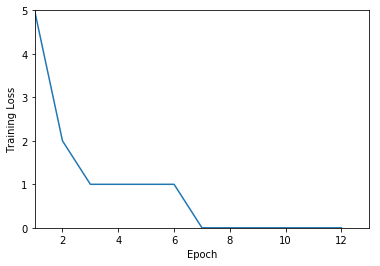

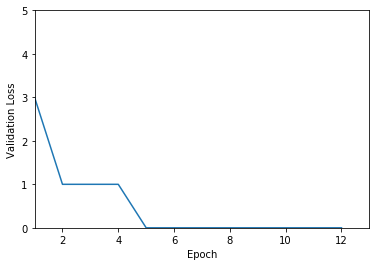

In [50]:
#plot
import numpy as np
import matplotlib.pyplot as plt
epoch_training_loss2 = model_transfer[1]
epoch_validation_loss2 = model_transfer[2]
epoch_x = np.arange(n_epochs)
plt.figure(3)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.plot(epoch_x+1, epoch_training_loss2, label='Training loss')

plt.ylim(0,5)
plt.xlim(1,n_epochs+1)
plt.show()
plt.figure(4)
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')

plt.plot(epoch_x+1, epoch_validation_loss2, label='Validation loss')
plt.ylim(0,5)
plt.xlim(1,n_epochs+1)
plt.show()

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [46]:
model_transfer1=model_transfer[0]
model_transfer1.load_state_dict(torch.load('model_transfer3.pt'))
test(loaders_transfer, model_transfer1, criterion_transfer, use_cuda)
train_accuracy(loaders_transfer, model_transfer1, criterion_transfer, use_cuda)
validation_accuracy(loaders_transfer, model_transfer1, criterion_transfer, use_cuda)


Test Loss: 0.641934


Test Accuracy: 79% (662/836)
Train Loss: 0.432195


Train Accuracy: 88% (5894/6680)
Validation Loss: 0.590911


Validation Accuracy: 83% (696/835)


In [188]:

def test_analysis_TL(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.
    
    classnum = 133
    target_num = torch.zeros((1,classnum))
    predict_num = torch.zeros((1,classnum))
    acc_num = torch.zeros((1,classnum))
   
    y_true = []
    y_pred = []
    
    model.eval()
    for batch_idx, (inputs, targets) in enumerate(loaders['test']):
        if use_cuda:
            inputs, targets = inputs.cuda(), targets.cuda()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        # loss is variable , if add it(+=loss) directly, there will be a bigger ang bigger graph.
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        predicted = outputs.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(predicted.eq(targets.data.view_as(predicted))).cpu().numpy())
        total += inputs.size(0)

        
      
        y_pred.append(predicted.data.cpu().numpy())
        y_true.append(targets.data.cpu().numpy())
        


    return y_pred,y_true



In [189]:
model_transfer1.load_state_dict(torch.load('model_transfer3.pt'))

y_pred_2,y_true_2=test_analysis_TL(loaders_transfer, model_transfer1, criterion_transfer, use_cuda)


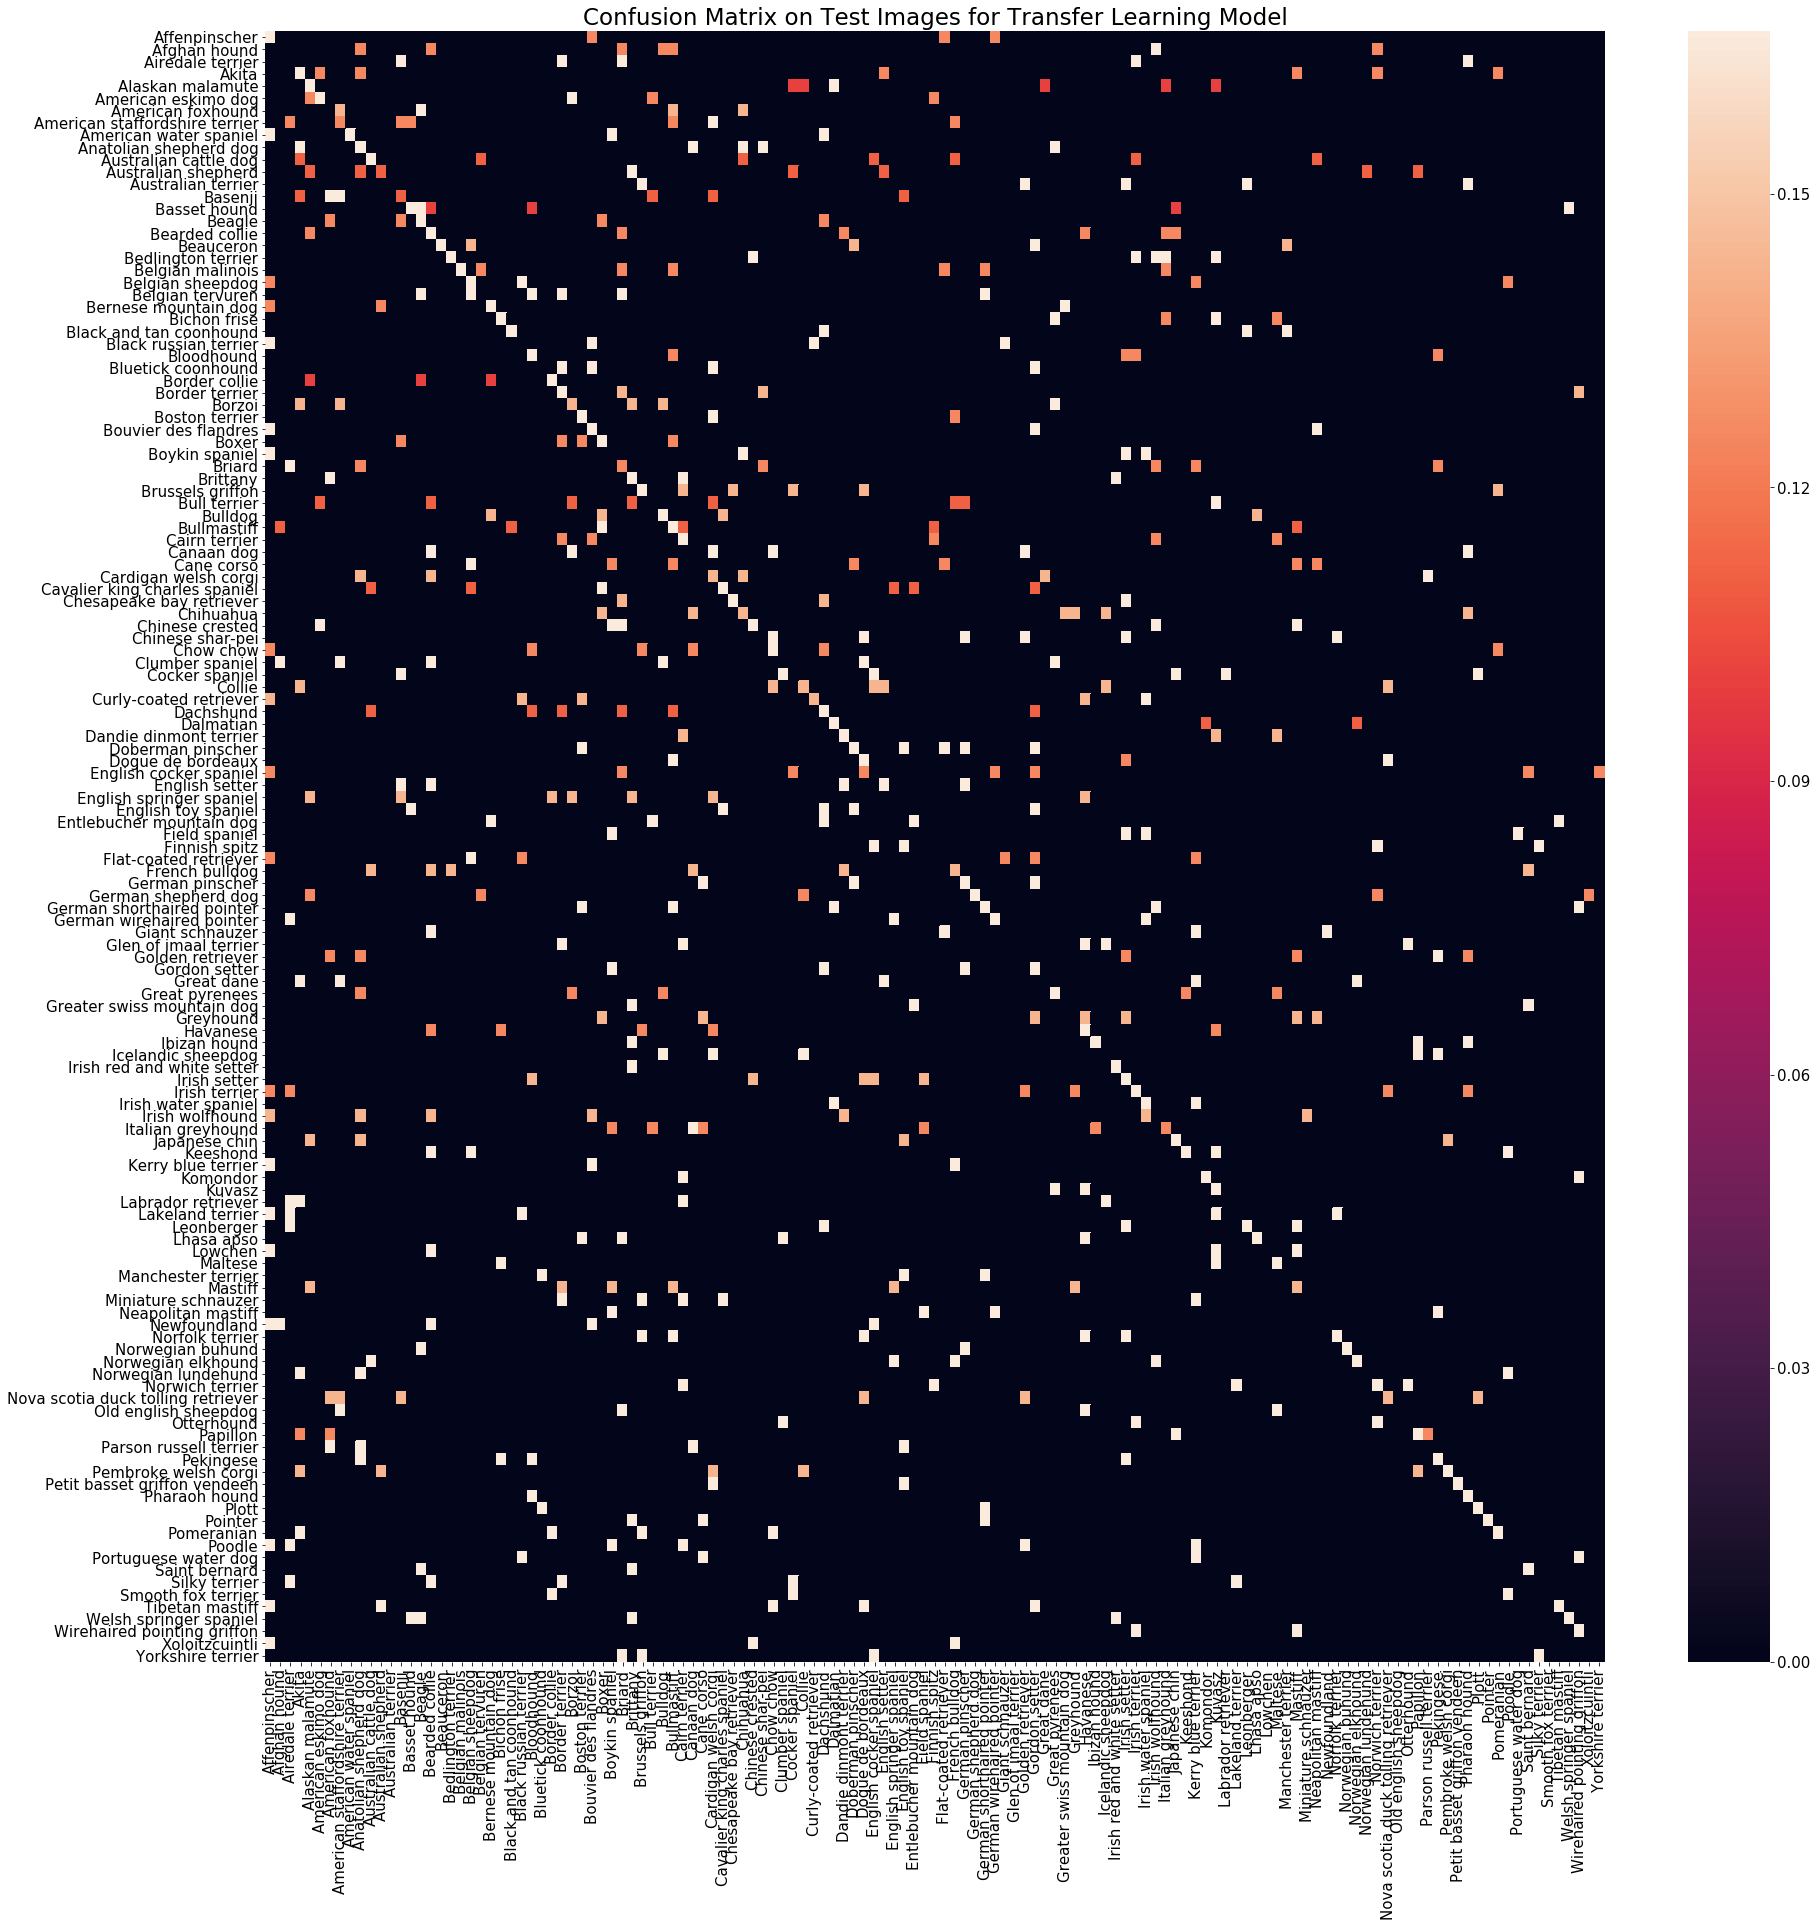

In [182]:
y_true_array_2 = np.concatenate([np.array(i) for i in y_true_2])
y_pred_a_2 = np.concatenate([np.array(i) for i in y_pred_2])
y_pred_array_2 = np.concatenate([np.array(i) for i in y_pred_a_2])   


cm_2 = confusion_matrix(y_true_array_2, y_pred_array_2)
#normalize the confusion matrix
cm_2 = cm_2.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(30, 30))
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.title('Confusion Matrix on Test Images for Transfer Learning Model')
_ = sns.heatmap(cm, ax=ax, yticklabels=class_test_names, xticklabels=class_test_names, robust=True)


In [178]:
print(classification_report(y_true=y_true_array_2, y_pred=y_pred_array_2, target_names=list(class_test_names)))


                                    precision    recall  f1-score   support

                     Affenpinscher       1.00      1.00      1.00         8
                      Afghan hound       1.00      1.00      1.00         8
                  Airedale terrier       0.75      1.00      0.86         6
                             Akita       0.75      0.75      0.75         8
                  Alaskan malamute       0.77      1.00      0.87        10
               American eskimo dog       1.00      0.88      0.93         8
                 American foxhound       0.55      0.86      0.67         7
    American staffordshire terrier       1.00      1.00      1.00         8
            American water spaniel       1.00      0.25      0.40         4
            Anatolian shepherd dog       0.75      1.00      0.86         6
             Australian cattle dog       1.00      0.67      0.80         9
               Australian shepherd       1.00      0.78      0.88         9
           

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [54]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in image_transfer_datasets['train'].classes]

def image_to_tensor(img_path):
    img = Image.open(img_path).convert('RGB')
    transformations = transforms.Compose([transforms.Resize(size=224),
                                          transforms.CenterCrop((224,224)),
                                         transforms.ToTensor(),
                                         transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                              std=[0.229, 0.224, 0.225])])
    image_tensor = transformations(img)[:3,:,:].unsqueeze(0)
    return image_tensor

def predict_breed_transfer(img_path):
    image_tensor = image_to_tensor(img_path)

    # move model inputs to cuda, if GPU available
    if use_cuda:
        image_tensor = image_tensor.cuda()

    # get sample outputs
    output = model_transfer1(image_tensor)
    # convert output probabilities to predicted class
    _, preds_tensor = torch.max(output, 1)
    pred = np.squeeze(preds_tensor.numpy()) if not use_cuda else np.squeeze(preds_tensor.cpu().numpy())
    return class_names[pred]

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [55]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
        
    if (face_detector(img_path)):
        print("Hello Human!")
        predicted_breed = predict_breed_transfer(img_path)
        plt.title(predicted_breed)
        plt.imshow(Image.open(img_path))        
        plt.show()
        print("You look like " + predicted_breed)
       
    # check if image has dogs:
    elif dog_detector(img_path):
        print("Hello Doggie!")
        predicted_breed = predict_breed_transfer(img_path)
        plt.title(predicted_breed)        
        plt.imshow(Image.open(img_path))        
        plt.show()    
        print("It looks like " + predicted_breed)
    else:
        print("Oh, we're sorry! We couldn't detect any dog or human face in the image.")
        plt.title("no human/dog!")  
        plt.imshow(Image.open(img_path))        
        plt.show()    

    print("\n")


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ Yes. It's expected. The improvement points can be 1) increase the number of training dataset; 2) Fine tune the model to give a better accuracy; 3) return the highly possible estimations of the breeds and keep them for later training stages.

Hello Human!


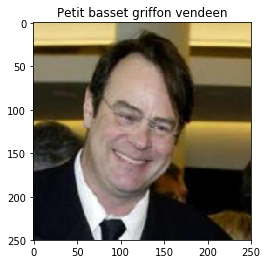

You look like Petit basset griffon vendeen


Hello Human!


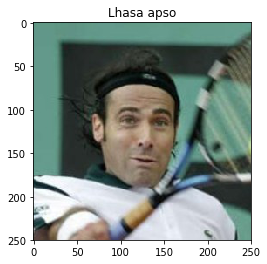

You look like Lhasa apso


Hello Human!


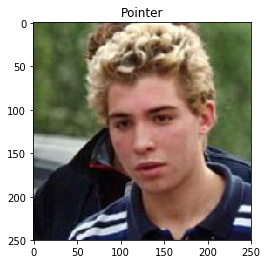

You look like Pointer


Hello Doggie!


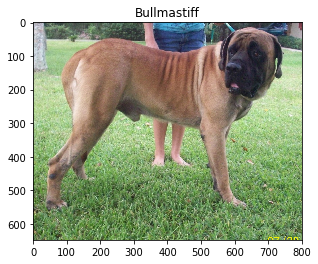

It looks like Bullmastiff


Hello Doggie!


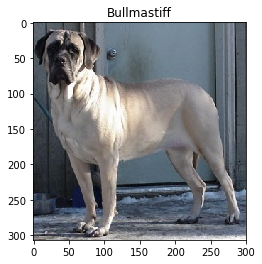

It looks like Bullmastiff


Hello Doggie!


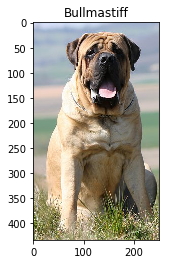

It looks like Bullmastiff




In [56]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
i = 0
for file in np.hstack((human_files[:3], dog_files[:3])):
    i += 1
    plt.figure(i)
    run_app(file)